# Transformer From Scratch

* General problem with the `rnn`, `lstm`, `encoder-decoder` was that they were not able to capture the `contextual meaning` of a word wrt other words in a sequence.

* So, came the concept of `self-attention`, where each word tries to find some-sort-of relation with other words in a sequence.

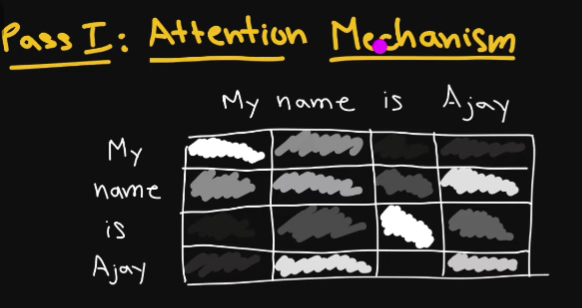


* Here, we can see that `ajay` is focusing much on `name` and `ajay`. i.e, it is trying to find  its relation with other words in the sentence.

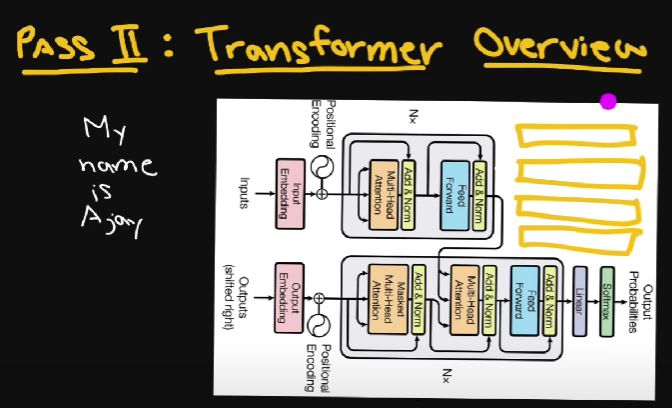

* Here, we pass the `input sentence` to the encoder and get the corresponding `encoded` vector for each word of the sentence.
* Inside the `encoder` alot of mathematical operations occur.
* Then it is simultaneously passed to the `decoder`.

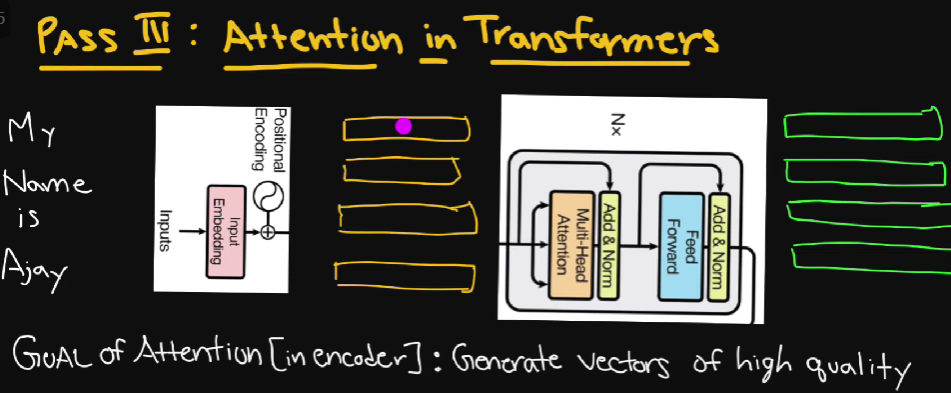

* Here, the `goal` of the `encoder` is to generate a `high quality vector` for any given sequence.
* That high quality vector :- have all the detailed info about the contextual relationship among the words, their positions, meaning and alot of different features.
* The size of each word vector is `512`.

#### How it solved the problem of `RNNs`?

* the training is done in parallel way.
* All the sentences of the input document are fed simultaneously to the encoder.
* And the encoder produce a more `context aware` encoded vectors out of those sequences although they are fed together.


* Every single word that is input to the transformer is breaken down to `query`, `key` and `value` vectors.
* and `scaler dot-product` is done between them.

#### Link to the code: Self attention/multi for tranformer NN

https://www.kaggle.com/code/prakashraushan/multi-head-attention-from-scratch-transformer/edit

# Positional encoding:

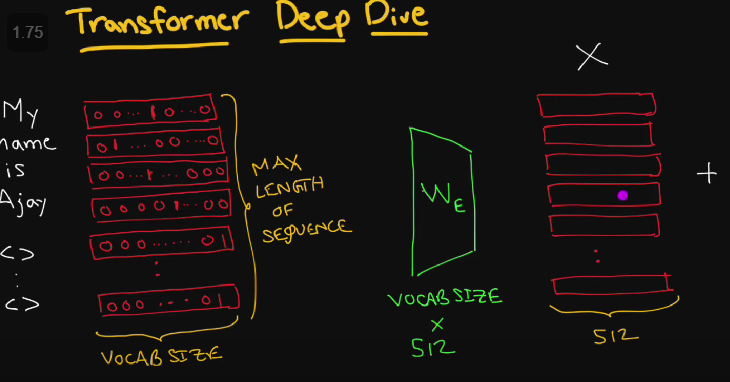

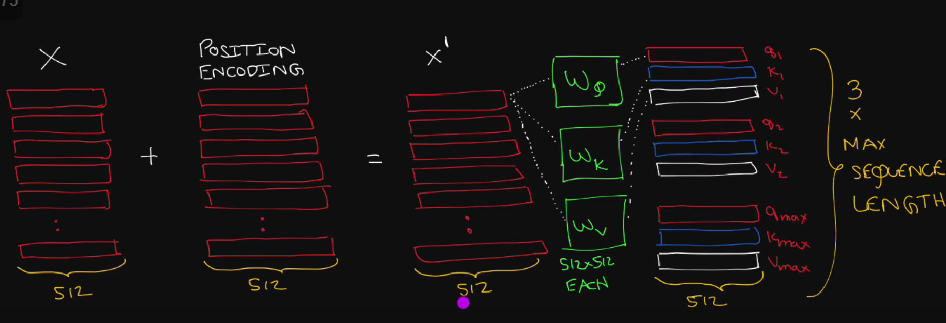

* In the `input sequence`, we are adding some positional encodings and then deriving `query`, `key and value` vectors

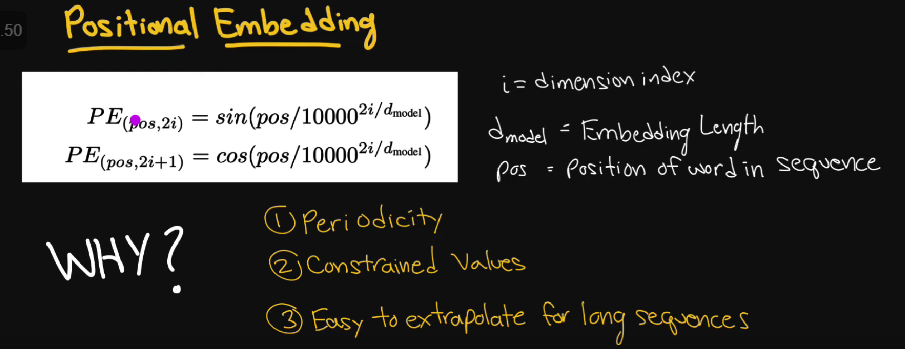

* `periodicity`: it will ensure that a given word pay attention to another word after every `x-th` positions. This will help to track the attention in a much more attractable way.
* `constrained value`:- positional encoding for a particular vector will greater than the next vectors and it will keep reducing. Thus a particular word will not derive context from words very far away.

# Layer Normalization

* Focus on the `add & norm` part:

  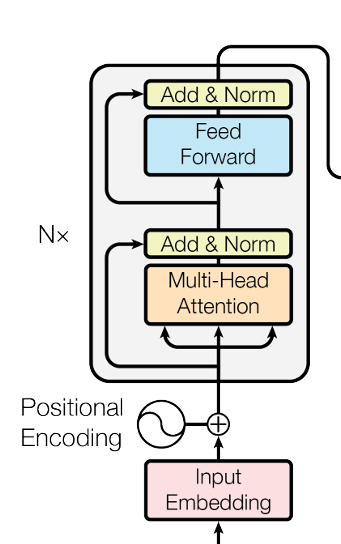

* After `multi-head` attention operations, after `concatenating` all the heads matrices, they are finally added to the `residual` and `normalization` is done to them to scale their values.

* gradients might become `0`, due to activation like `relu`, `elu` etc.
* Residual are added to ensure `stronger connections` that flow through the deep network, and in long run it doesnot encounter `vanishing gradient` problem.
  

* output of intermediate layers can be wide range of `negative` and `positive` values.
* done for stable training
* It normalizes the `distribution of the intermediate layers`.
* So set of new parameters for the correspondig `mean` and `standard deviations` are introduced.

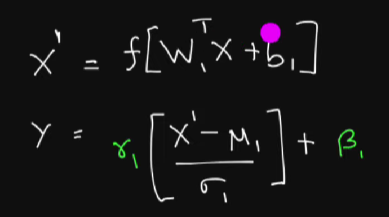

* $\gamma$ and $\beta$ are learnable parameters and can be for `each layer` or for `a batch`.

# Encoder

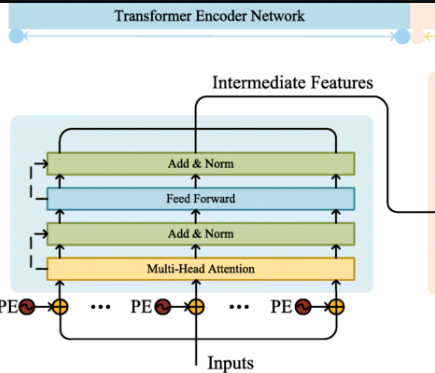 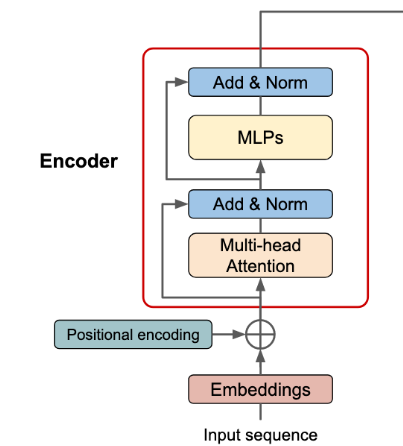

* inside the `ffn`, we might have `linear, dropout, ` layers.
* The whole part of the `encoder` operations occur in a loop for $N_x$ times.
* Values of words after the encoding part will have more `contextual `meaning of the words.

* Attention matrix after the encoder operations will look like.
* Where we can see that how much `weightage` each word is giving to the other words.

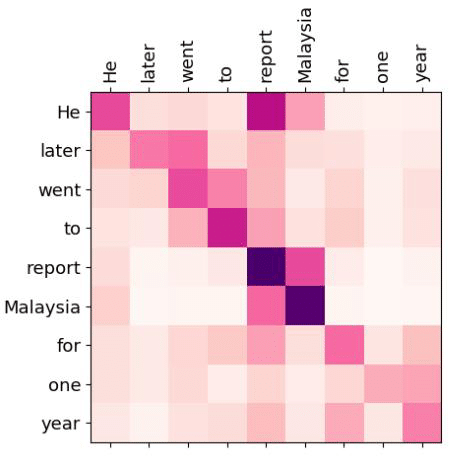

## code for the encoder part:-

https://www.kaggle.com/code/prakashraushan/transformer-encoder-architecture-from-scratch

# Decoder

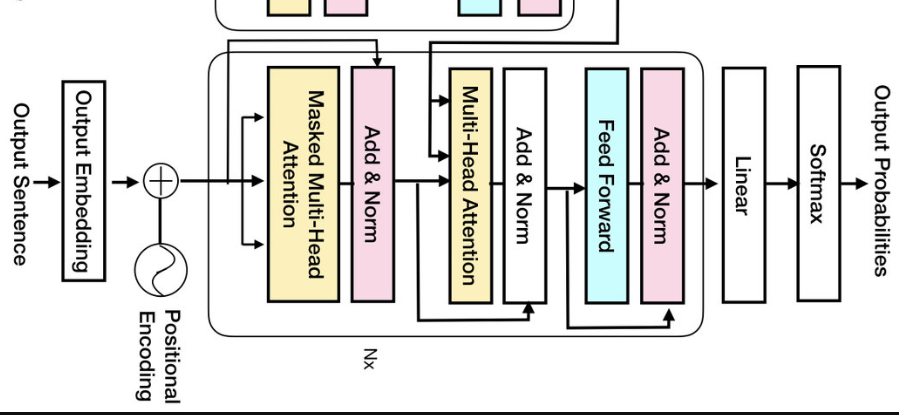

* Same operations, but with the `output` sequence fed to the decoder.
* Masking is done to prevent it from `cheating`, ie. dont' want a word to see other upcoming words. Don't want it to attend to other upcoming words.
* There are alot of `residual connections` to ensure that the backpropagation dont' fail due to `vanishing gradient`. So before `normalizing` we add the `earlier value` + `masked vector`
* normalization scale down the values to `normal distributtion` and introduces some other parameters `gamma and beta`.
#### 2nd `multi-head attention`.
* we can see `2` arrows are coming from the encoder and `1` from the decoder.
* It receive `query` from the itself and `key, values` from the encoder ie. concatenated of size `1024`, `512` each for `key and value`.
* For `query` one can use the same incoming vector or `linear transformation` after using a `feed forward network` with same no of parameters.

#### Each `query` vector in `output sequence` will attend every `key and value` vector in `output sequence`.

* In attention calculation, our `query` vector is trying to find the `affinity` of every single word in `output sequence - hindi` to every single word in `input-sequence - English`.
* Thus we'll get an attention matrix where each word in the output sequence will be attending every single word in the input sequence.
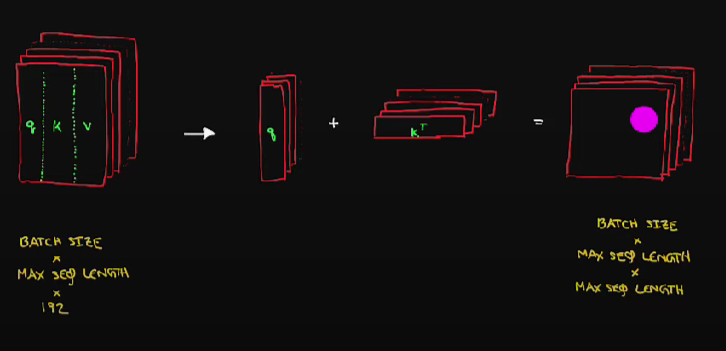

#### We don't do masking in the `second multi-head attention`.
* Since we want every `hindi` word to attend every other words in input sequence - `english`.

#### And this whole `attention` calculation inside the decoder is repeated $N_x$ no of times till we get the desired `high level context encoding`.

* Finally this is expanded by mapping to a `ffn`, then softmax to find `probability` of printing of each output word.
* I.e, for against every `input english word`, we'll have a probaility vector of all the `output hindi words`.
* and the argMax index `output ` word will be thrown as output translation to that word.
* Based on the predicted output, we find the `loss ` for all the input sentences for a given batch, `add them`, `backpropagate `
* Use `cross-entropy ` loss function.
* We ignore the `paddings` 

## Inference : testing

* Every word is passed to the decoder with `<start>` padded initially, then it goes althrough the decoder layers, come out of softmax.
* Then the predicted output word is passed back to the decoder input, and with its help we try to predict the next output.
* In this way we keep getting intermediate translation, and keep pusing them back to the decoder to complete the next words.

In [ ]:
## Decoder code from scratch: kaggle:-
